In [9]:
import numpy as np
import matplotlib.pyplot as plot

from bandit_agents import PolicyAgent, BanditEnvironment, EpsilonGreedyAgent, UCBAgent, ThompsonSamplingAgent, PolicyOptimizationAgent, train

In [6]:
environment = BanditEnvironment(np.array([0.2, 0.3, 0.4, 0.7, 0.9], dtype=np.float32))

n_train_steps = 5000

agents = [
    ("greedy with warmup", lambda: EpsilonGreedyAgent(environment.n_actions, 0, n_train_steps // 10)),
    ("epsilon = 0.1 greedy", lambda: EpsilonGreedyAgent(environment.n_actions, 0.1, 0)),
    ("UCB", lambda: UCBAgent(environment.n_actions)),
    ("thompson sampling", lambda: ThompsonSamplingAgent(environment.n_actions)),
    ("policy Optimization lr = 0.1, no baseline", lambda: PolicyOptimizationAgent(environment.n_actions, 0.1, None)),
    ("policy Optimization lr = 1.0, no baseline", lambda: PolicyOptimizationAgent(environment.n_actions, 1.0, None)),
    ("policy Optimization lr = 0.1, with baseline", lambda: PolicyOptimizationAgent(environment.n_actions, 0.1, 0.9)),
    ("policy Optimization lr = 1.0, with baseline", lambda: PolicyOptimizationAgent(environment.n_actions, 1.0, 0.9)),
]

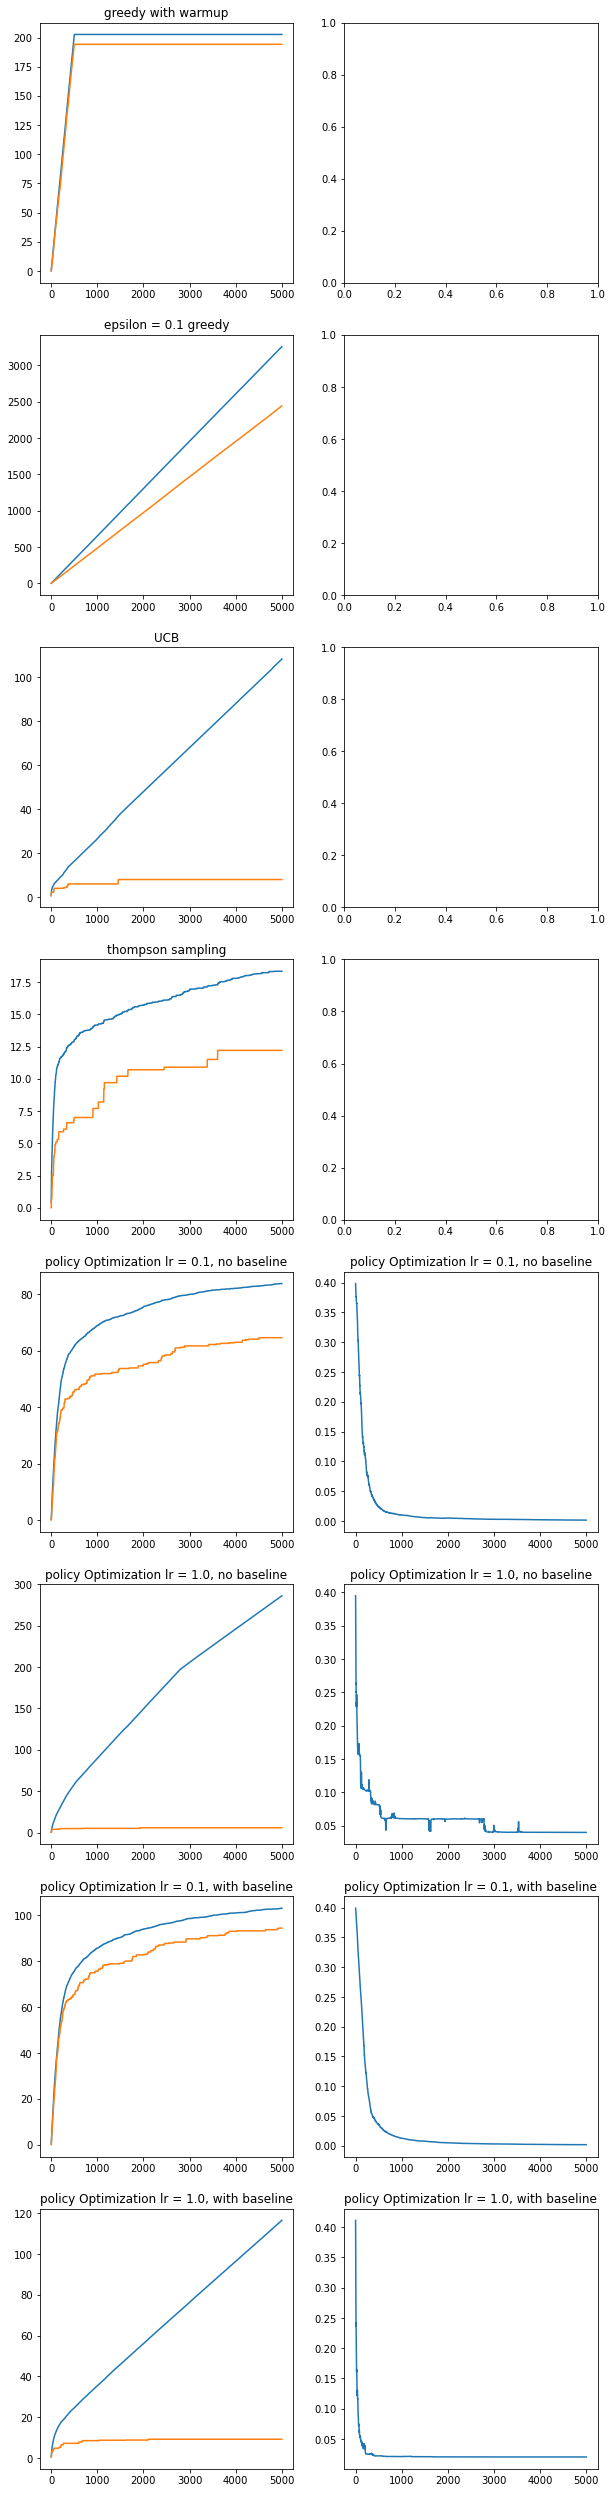

In [34]:
fig, axes = plot.subplots(len(agents), 2, figsize=[10, 45])

n_runs = 10

for (name, agent_fn), (regrets_axis, expected_rewards_axis) in zip(agents, axes):
    total_regrets = np.zeros(shape=n_train_steps)
    total_expected_regrets = np.zeros(shape=n_train_steps)

    minimal_regrets = np.full(shape=n_train_steps, fill_value=float('inf'))

    for _ in range(n_runs):
        agent = agent_fn()

        regrets, expected_rewards = train(environment, agent, n_train_steps)

        regrets = np.array(regrets)

        total_regrets += regrets
        minimal_regrets = np.minimum(minimal_regrets, regrets)

        if len(expected_rewards) > 0:
            total_expected_regrets += np.array(expected_rewards)

    regrets_axis.set_title(name)
    regrets_axis.plot(total_regrets / n_runs)
    regrets_axis.plot(minimal_regrets)

    if isinstance(agent, PolicyAgent):
        expected_rewards_axis.set_title(name)
        expected_rewards_axis.plot(total_expected_regrets / n_runs)